## 1-5. 색(Color)과 스타일 시트(Style sheets)

### 1-5-1. matplotlib에서 색 사용하기

색은 어떤 내용을 시각적으로 인지할 때 가장 중요한 요소입니다. 
시각화는 결국 보여주기 위한 작업인만큼 색을 선정하는 건 중요합니다. 

지금까지 데이터를 직접 타이핑해서 시각화했습니다. 
이번에는 유명한 데이터셋과 데이터 분석 파이썬 라이브러리인 pandas를 조금씩 활용하며 보다 실용적인 시각화를 해보겠습니다.

> 이 절을 시작하기 전에 !pip install pandas scikit-learn를 해주세요. 사이킷런(scikit-learn)은 머신러닝 라이브러리이지만 예제 데이터셋을 불러오기 위해 사용할 예정입니다.

In [50]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

우선 sklearn의 load_iris 함수를 사용하여 붓꽃(iris) 데이터셋을 불러옵시다.

붓꽃 데이터셋은...(설명 추가 예정)

In [51]:
# 붓꽃 데이터셋에서 pandas용 DataFrame을 불러옵니다.
iris = load_iris(as_frame=True).frame 

가볍게 체크하기 위해 각 데이터들이 어떤 **특성(feature)**이 있는지 살펴봅시다.

In [52]:
print(f'데이터의 개수는 {len(iris)}개입니다.')
print(f'데이터에는 다음과 같은 특징이 있습니다.\n', list(iris.columns))

데이터의 개수는 150개입니다.
데이터에는 다음과 같은 특징이 있습니다.
 ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)', 'target']


In [54]:
iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


붓꽃에 따라 다양한 정보가 담겨 있는 걸 볼 수 있습니다.

여기서 `target`값은 붓꽃의 종류입니다. 붓꽃이 종류별로 각각 몇 개 있는지 살펴보겠습니다. 

In [79]:
iris_type = iris['target'].value_counts().sort_index()
print(iris_type)

0    50
1    50
2    50
Name: target, dtype: int64


우리는 각 종류 0, 1, 2 종류의 꽃의 개수가 50개인걸 바로 인지할 수 있지만 연습 단계인만큼 시각화를 진행해봅시다.

이 내용을 비교를 위한 막대 그래프와 구성을 보기 위한 원 그래프로 살펴보겠습니다.

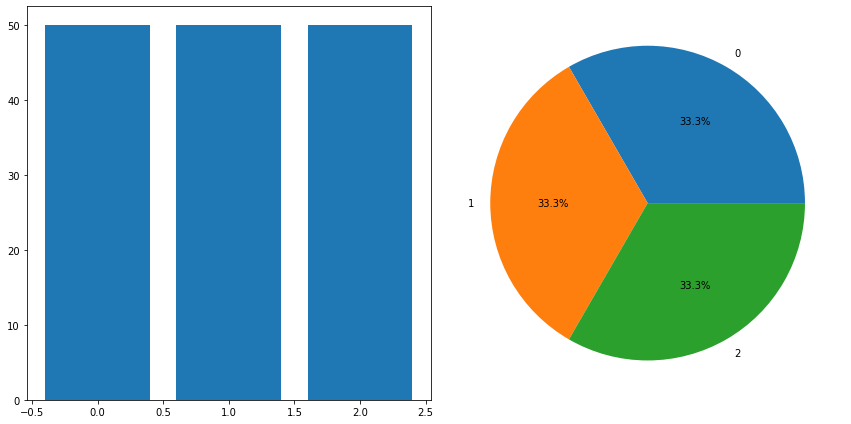

In [80]:
# 이제 이 내용을 시각화하면 다음과 같습니다.
fig, axes = plt.subplots(1, 2, figsize=(12, 6)) # figsize는 figure의 사이즈
axes[0].bar(iris_type.index, iris_type)
axes[1].pie(iris_type, labels=iris_type.index, autopct='%1.1f%%')
plt.tight_layout()
plt.show()

물론 현재 가독성이 떨어지지만 우리는 1가지를 알 수 있습니다.

**matplotlib은 자동으로 색을 정해준다.**

기본색은 파란색, 그 외에도 주황색, 초록색이 있다는 걸 알 수 있습니다. 
이런 색의 조합을 **칼라맵(colormap)** 이라고 하며 일반적으로 차이(종류, 수, 밀도 등)를 보여주기 위해 사용합니다.

원 그래프의 경우에는 구성을 보기 위한 목적으로 색을 구분해주는 것이 좋습니다.

하지만 색을 가독성이 있고 커스텀하여 정하는 것은 매우 어렵기에 기본적으로 matplotlib에서 제공하는 칼라맵들이 있습니다. 보통은 `cm`이라는 인자를 통해 설정할 수 있으며 커스텀 칼라맵들도 사용할 수 있습니다. 이 부분은 후에 다양한 차트에서 사용하면서 익혀보겠습니다.

> matplotlib의 default colormap은 *tab10* 입니다.

그렇다면 비교에 적합한 막대 그래프도 색을 입혀보겠습니다. 
matplotlib의 막대그래프는 `colormap`이 따로 없기에 color를 개별적으로 사용해줘야 합니다.


matplotlib에서 커스텀 색은 `color`라는 인자를 통해 설정할 수 있으며 보통 지정하는 색 타입을 데이터 개수에 맞는 배열로 전달할 수 있습니다. 만약 단일 색상을 지정하면 전체색이 바뀝니다.

한번 코드 예시로 살펴보겠습니다.


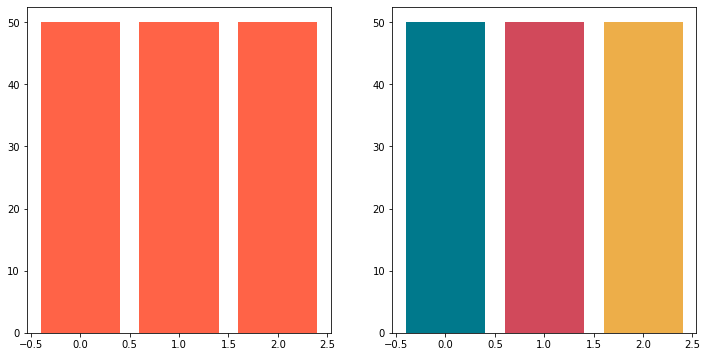

In [85]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
axes[0].bar(iris_type.index, iris_type, color='tomato')
axes[1].bar(iris_type.index, iris_type, 
            # ggplot2 theme : blue, red, yellow
            color=['#00798c', '#d1495b', '#edae49'] 
           )
plt.show()

현재 색상을 정하는 데 2가지 명칭을 사용해보았습니다.

1. X11/CSS4 : 흔히 사용하는 명칭 [(색 리스트)](https://matplotlib.org/3.1.0/gallery/color/named_colors.html)
2. Hex RGB : 16진수로 표기하는 색 
    - 앞 순서부터 2자리씩 빨강, 초록, 파랑을 의미 

이외에도 RGB 값을 [0, 1] 사이로 표현하는 방식 등 더 많은 방법이 있습니다. 이는 후에 색을 더 자세하게 다룰 때 살펴보겠습니다. 

이제 이전에 다뤘던 산점도에도 적용해보겠습니다.

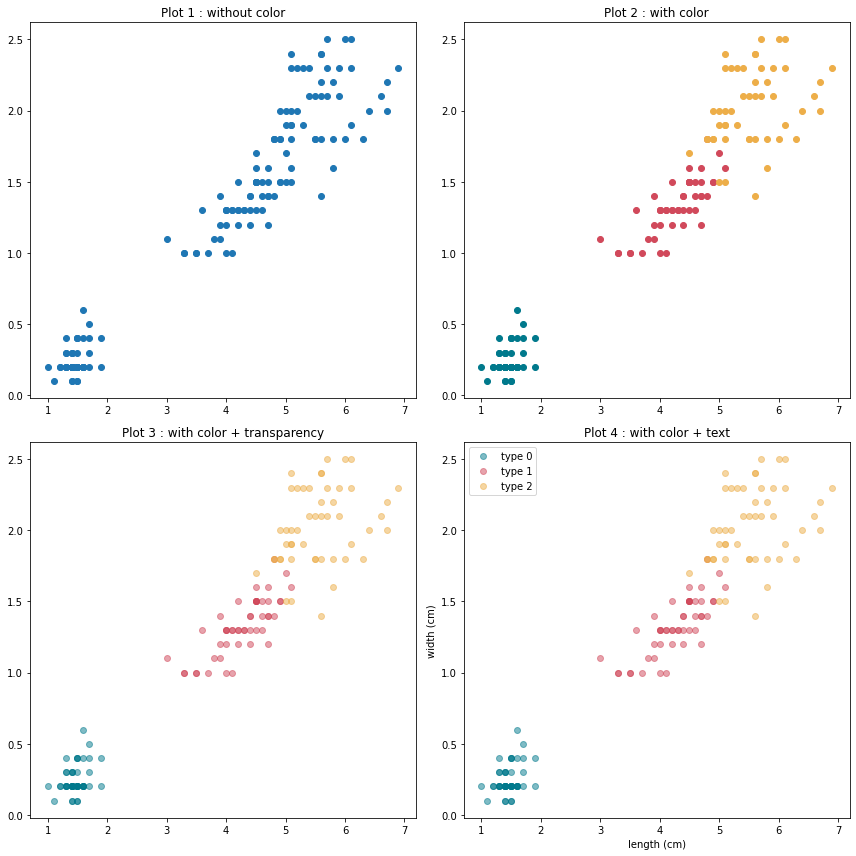

In [125]:
fig, axes = plt.subplots(2, 2, figsize=(12, 12))


# Plot 1 : 아무런 정보 없이 단순한 scatter
axes[0][0].set_title('Plot 1 : without color') # 제목 추가
axes[0][0].scatter(x=iris['petal length (cm)'], y=iris['petal width (cm)'])


# Plot 2 : 객체 지향 방식으로 각 target별로 plot을 한 ax에 그리기
axes[0][1].set_title('Plot 2 : with color')
for iris_type, color in enumerate(['#00798c', '#d1495b', '#edae49']):
    axes[0][1].scatter(x=iris[iris['target']==iris_type]['petal length (cm)'], 
                    y=iris[iris['target']==iris_type]['petal width (cm)'], 
                    color=color, label=f'type {iris_type}')

 
    
# Plot 3 : 투명도를 추가하여 밀도 파악가능
axes[1][0].set_title('Plot 3 : with color + transparency')
for iris_type, color in enumerate(['#00798c', '#d1495b', '#edae49']):
    axes[1][0].scatter(x=iris[iris['target']==iris_type]['petal length (cm)'], 
                       y=iris[iris['target']==iris_type]['petal width (cm)'], 
                       color=color, label=f'type {iris_type}',
                       alpha=0.5)    


    
# Plot 4 : Text 정보를 추가하여 가독성 높임    
axes[1][1].set_title('Plot 4 : with color + text')
for iris_type, color in enumerate(['#00798c', '#d1495b', '#edae49']):
    axes[1][1].scatter(x=iris[iris['target']==iris_type]['petal length (cm)'], 
                       y=iris[iris['target']==iris_type]['petal width (cm)'], 
                       color=color, label=f'type {iris_type}',
                       alpha=0.5)    

axes[1][1].legend(loc='upper left') # 범주 (좌측상단)
axes[1][1].set_xlabel('length (cm)') # X축 Label
axes[1][1].set_ylabel('width (cm)') # Y축 Label

plt.tight_layout()
plt.show()

왼쪽부터 차근차근 정보가 추가되는 것을 살펴보겠습니다.

- plot 1 : **전체적인 붓꽃 데이터의 꽃잎 정보(분포)**를 살펴볼 수 있음
- plot 2 : 붓꽃 **종류별** 꽃잎 정보(분포)를 살펴볼 수 있음
- plot 3 : 색상에 **투명도**를 주어 분포에 대한 보다 정확한 이해(**조밀도**)를 도움
- plot 4 : x축과 y축에 정보와 각 색이 의미하는 정보를 **텍스트로 제공**하여 **가독성**을 높임

plot 2와 plot 3처럼 투명도도 색의 하나의 요소임을  이해하면 좋습니다.
마지막 plot 4의 경우에는 단순하게 텍스트 정보를 제공함으로 그래프의 퀄리티나 정보량을 매우 높인 걸 볼 수 있습니다.

다음 절에서는 plot내에서 어디에 어떤 텍스트를 추가할 수 있는지 살펴볼 예정이지만, 살짝 맛보기로 보여드렸습니다.
그리고 차트의 종류나 데이터의 종류에 따라도 적합한 색 선정은 추후에 다양한 그래프를 그리며 더 살펴보겠습니다.

### 1-5-2. 스타일 시트 (Style sheets)

디자인 감각이 뛰어나 그래프를 그릴 때마다 하나씩 커스텀해서 plot을 그려주면 좋겠지만 여러가지 단점이 있습니다.

- 같은 주제에 대해 다양한 칼라맵을 쓰면 가독성이 떨어진다.
- 매번 색상 정보를 코드에 작성하기에는 생산성이 떨어진다.

그래서 사용할 수 있는 것이 **스타일 시트(style sheets)** 입니다. 

이를 사용하면 칼라맵을 포함한 그리드, 배경색 등 default 설정을 바꾸어 전체적인 통일성을 주고 본인만의 시각화를 진행할 수 있습니다.
이 내용도 컬러맵과 마찬가지로 matplotlib이 제공하는 스타일이 있고, 커스텀 스타일도 만들 수 있습니다.

`plt.style.use()`함수로 전역적인 사용을 할 수 있고, `with plt.style.context()`로 일회성으로 사용할 수도 있습니다.
아직은 custom보다는 기본적인 기능을 아는 것이 중요하니 이런 내용은 후반에 더 다루도록 하겠습니다.

In [129]:
print('matplotlib의 stylesheets은 다음과 같습니다\n', plt.style.available)

matplotlib의 stylesheets은 다음과 같습니다
 ['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


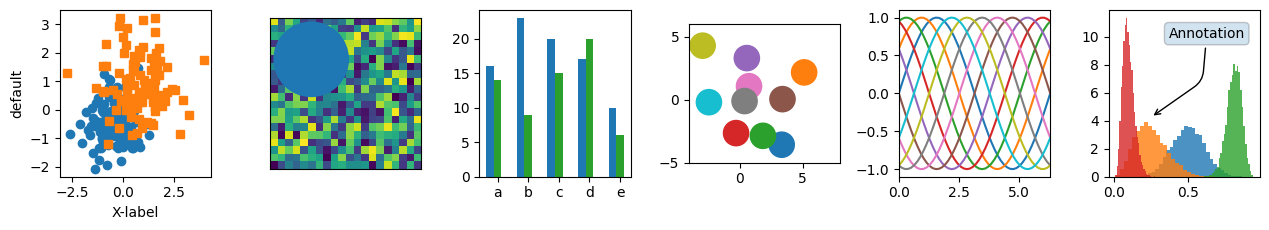

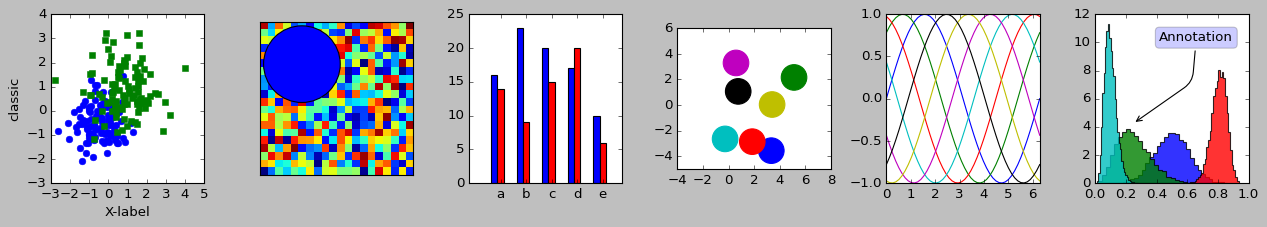

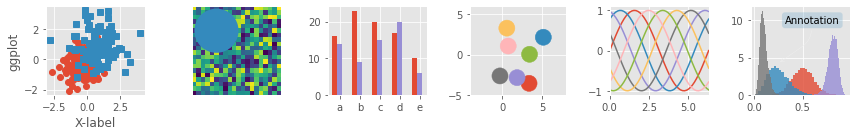

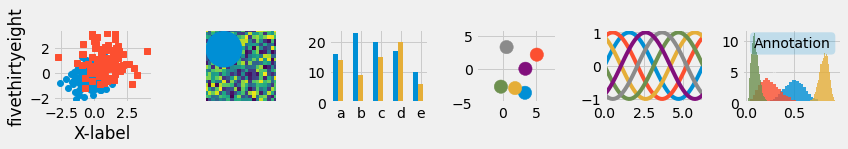

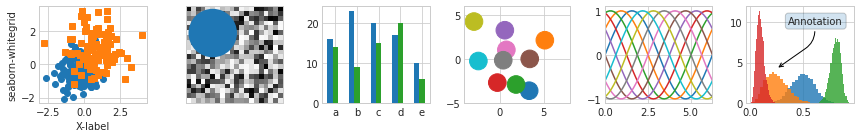

In [132]:
# 코드는 무시해도 됩니다.
# 출처 : https://matplotlib.org/3.1.0/gallery/style_sheets/style_sheets_reference.html
import numpy as np
import matplotlib.pyplot as plt

# Fixing random state for reproducibility
np.random.seed(20200720)


def plot_scatter(ax, prng, nb_samples=100):
    """Scatter plot.
    """
    for mu, sigma, marker in [(-.5, 0.75, 'o'), (0.75, 1., 's')]:
        x, y = prng.normal(loc=mu, scale=sigma, size=(2, nb_samples))
        ax.plot(x, y, ls='none', marker=marker)
    ax.set_xlabel('X-label')
    return ax


def plot_colored_sinusoidal_lines(ax):
    """Plot sinusoidal lines with colors following the style color cycle.
    """
    L = 2 * np.pi
    x = np.linspace(0, L)
    nb_colors = len(plt.rcParams['axes.prop_cycle'])
    shift = np.linspace(0, L, nb_colors, endpoint=False)
    for s in shift:
        ax.plot(x, np.sin(x + s), '-')
    ax.set_xlim([x[0], x[-1]])
    return ax


def plot_bar_graphs(ax, prng, min_value=5, max_value=25, nb_samples=5):
    """Plot two bar graphs side by side, with letters as x-tick labels.
    """
    x = np.arange(nb_samples)
    ya, yb = prng.randint(min_value, max_value, size=(2, nb_samples))
    width = 0.25
    ax.bar(x, ya, width)
    ax.bar(x + width, yb, width, color='C2')
    ax.set_xticks(x + width)
    ax.set_xticklabels(['a', 'b', 'c', 'd', 'e'])
    return ax


def plot_colored_circles(ax, prng, nb_samples=15):
    """Plot circle patches.

    NB: draws a fixed amount of samples, rather than using the length of
    the color cycle, because different styles may have different numbers
    of colors.
    """
    for sty_dict, j in zip(plt.rcParams['axes.prop_cycle'], range(nb_samples)):
        ax.add_patch(plt.Circle(prng.normal(scale=3, size=2),
                                radius=1.0, color=sty_dict['color']))
    # Force the limits to be the same across the styles (because different
    # styles may have different numbers of available colors).
    ax.set_xlim([-4, 8])
    ax.set_ylim([-5, 6])
    ax.set_aspect('equal', adjustable='box')  # to plot circles as circles
    return ax


def plot_image_and_patch(ax, prng, size=(20, 20)):
    """Plot an image with random values and superimpose a circular patch.
    """
    values = prng.random_sample(size=size)
    ax.imshow(values, interpolation='none')
    c = plt.Circle((5, 5), radius=5, label='patch')
    ax.add_patch(c)
    # Remove ticks
    ax.set_xticks([])
    ax.set_yticks([])


def plot_histograms(ax, prng, nb_samples=10000):
    """Plot 4 histograms and a text annotation.
    """
    params = ((10, 10), (4, 12), (50, 12), (6, 55))
    for a, b in params:
        values = prng.beta(a, b, size=nb_samples)
        ax.hist(values, histtype="stepfilled", bins=30,
                alpha=0.8, density=True)
    # Add a small annotation.
    ax.annotate('Annotation', xy=(0.25, 4.25),
                xytext=(0.9, 0.9), textcoords=ax.transAxes,
                va="top", ha="right",
                bbox=dict(boxstyle="round", alpha=0.2),
                arrowprops=dict(
                          arrowstyle="->",
                          connectionstyle="angle,angleA=-95,angleB=35,rad=10"),
                )
    return ax


def plot_figure(style_label=""):
    """Setup and plot the demonstration figure with a given style.
    """
    # Use a dedicated RandomState instance to draw the same "random" values
    # across the different figures.
    prng = np.random.RandomState(96917002)

    # Tweak the figure size to be better suited for a row of numerous plots:
    # double the width and halve the height. NB: use relative changes because
    # some styles may have a figure size different from the default one.
    (fig_width, fig_height) = plt.rcParams['figure.figsize']
    fig_size = [fig_width * 2, fig_height / 2]

    fig, axes = plt.subplots(ncols=6, nrows=1, num=style_label,
                             figsize=fig_size, squeeze=True)
    axes[0].set_ylabel(style_label)

    plot_scatter(axes[0], prng)
    plot_image_and_patch(axes[1], prng)
    plot_bar_graphs(axes[2], prng)
    plot_colored_circles(axes[3], prng)
    plot_colored_sinusoidal_lines(axes[4])
    plot_histograms(axes[5], prng)

    fig.tight_layout()

    return fig


if __name__ == "__main__":

    # Setup a list of all available styles, in alphabetical order but
    # the `default` and `classic` ones, which will be forced resp. in
    # first and second position.
    style_list = ['default', 'classic', 'ggplot', 'fivethirtyeight', 'seaborn-whitegrid']

    # Plot a demonstration figure for every available style sheet.
    for style_label in style_list:
        with plt.style.context(style_label):
            fig = plot_figure(style_label=style_label)

    plt.show()

이렇게 스타일시트가 다양하기에 꼭 디자인 감각이 뛰어나지 않더라도 시각화를 진행할 수 있습니다. 

보다 자세한 사용법은 **matplotlib 색 응용(TBD)**에서 다루겠습니다.